## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")
# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
combined_df['Mouse ID'].value_counts()

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
dupe

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_df  = combined_df.loc[combined_df["Mouse ID"]== "g989"]
dupe_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_merge_df = combined_df.loc[combined_df["Mouse ID"] != "g989"]

clean_merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_merge_df['Mouse ID'].unique())


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grouped_drug = clean_merge_df.groupby(['Drug Regimen'])
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean = grouped_drug['Tumor Volume (mm3)'].mean()

sum_df = pd.DataFrame(data=mean)

sum_df.rename(columns={"Tumor Volume (mm3)" : "Mean"}, inplace=True)

sum_df['Median'] = grouped_drug['Tumor Volume (mm3)'].median()

sum_df['Variance'] = grouped_drug['Tumor Volume (mm3)'].var()

sum_df['Standard Deviation'] = grouped_drug['Tumor Volume (mm3)'].std()

sum_df['SEM'] = grouped_drug['Tumor Volume (mm3)'].sem()

sum_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_df = grouped_drug.aggregate({"Tumor Volume (mm3)":['mean', 'median', 'var', 'std', 'sem']})
agg_df


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:title={'center':'Number of Timepoints per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Total Timepoints'>

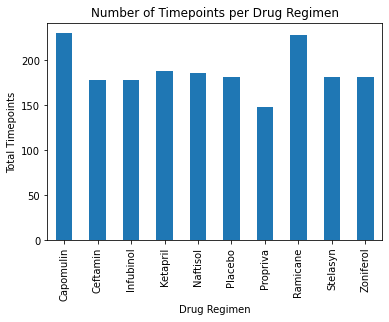

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint = clean_merge_df.groupby(['Drug Regimen'])['Timepoint'].count()
timepoint.plot.bar(ylabel='Total Timepoints', title='Number of Timepoints per Drug Regimen')


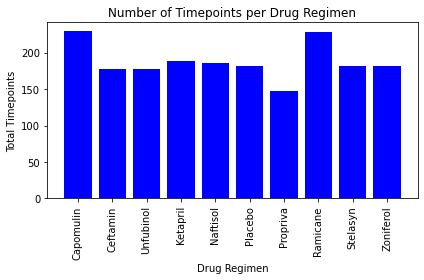

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

time_count_chart = timepoint
x_axis = ['Capomulin', 'Ceftamin', 'Unfubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
plt.bar(x_axis, time_count_chart, color="b", align="center")

#set parameters
plt.xlabel("Drug Regimen")
plt.ylabel("Total Timepoints")
plt.title("Number of Timepoints per Drug Regimen")
plt.xticks(rotation = 90)
plt.tight_layout()

plt.show()


<AxesSubplot:title={'center':'Gender Distribution'}, ylabel='Mouse ID'>

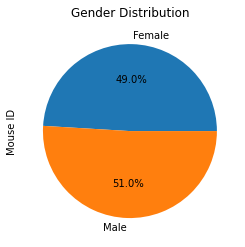

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_drug_group = clean_merge_df.groupby(['Sex'])
gender_count = gender_drug_group['Mouse ID'].count()
gender_count.plot.pie(autopct='%1.1f%%', title='Gender Distribution')


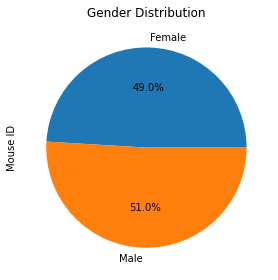

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_count_chart = gender_count

# Set the ylabel using class methods
labels = ["Female", "Male"]
plt.pie(gender_count_chart, autopct="%1.1f%%", labels=labels)
plt.title("Gender Distribution")
plt.ylabel("Mouse ID")
plt.tight_layout()
plt.show()



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
promising_df = clean_merge_df.set_index("Drug Regimen").loc[["Capomulin","Ramicane", "Infubinol","Ceftamin"]].reset_index()

# Start by getting the last (greatest) timepoint for each mouse
promising_grouped = promising_df.groupby('Mouse ID')['Timepoint'].max()
grouped_promising_df = pd.DataFrame(promising_grouped)
grouped_promising_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_promising_df = pd.merge(grouped_promising_df, promising_df, on=['Timepoint', 'Mouse ID'])
merged_promising_df

,Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,45,a203,Infubinol,Female,20,23,67.973419,2
1,45,a251,Infubinol,Female,21,25,65.525743,1
2,45,a275,Ceftamin,Female,20,28,62.999356,3
3,45,a411,Ramicane,Male,3,22,38.407618,1
4,45,a444,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,45,y769,Ceftamin,Female,6,27,68.594745,4
96,45,y793,Capomulin,Male,17,17,31.896238,2
97,45,y865,Ceftamin,Male,23,26,64.729837,3
98,45,z578,Ramicane,Male,11,16,30.638696,0


In [14]:
treatments = ["Capomulin","Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments: 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = merged_promising_df.loc[merged_promising_df['Drug Regimen']== treatment, 'Tumor Volume (mm3)']
    tumor_list.append(tumor_vol)
    
    # add subset 
    #calculate values
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lower = round(quartiles[.25], 4)
    upper = round(quartiles[.75], 4)
    iqr = round(upper - lower, 4)
    
    #print values
    print(f'Drug Name: {treatment}')
    print(f'Lower Quartile: {lower}')
    print(f'Lower Quartile: {upper}')
    print(f'Interquartile range: {iqr}')
        
    # Determine outliers using upper and lower bounds
    #calculate values
    lower_b = round(lower - (iqr*1.5), 4)
    upper_b = round(upper + (iqr*1.5), 4)
    
    #print values
    print(f'Values below may be outliers: {lower_b}')
    print(f'Values below may be outliers: {upper_b}')
    print('\n')
    

Drug Name: Capomulin
Lower Quartile: 32.3774
Lower Quartile: 40.1592
Interquartile range: 7.7818
Values below may be outliers: 20.7047
Values below may be outliers: 51.8319


Drug Name: Ramicane
Lower Quartile: 31.5605
Lower Quartile: 40.659
Interquartile range: 9.0985
Values below may be outliers: 17.9128
Values below may be outliers: 54.3067


Drug Name: Infubinol
Lower Quartile: 54.0486
Lower Quartile: 65.5257
Interquartile range: 11.4771
Values below may be outliers: 36.8329
Values below may be outliers: 82.7414


Drug Name: Ceftamin
Lower Quartile: 48.7221
Lower Quartile: 64.2998
Interquartile range: 15.5777
Values below may be outliers: 25.3555
Values below may be outliers: 87.6664




<function matplotlib.pyplot.show(close=None, block=None)>

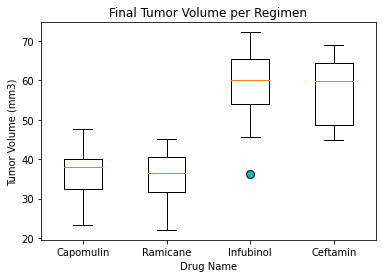

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#set y axis labels
drug_labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#format box plot
fig, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume per Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Name')

#mark outliers
flierprops = dict(marker='o', markerfacecolor='c', markersize=8)

#generate box plot
ax1.boxplot(tumor_list, labels=drug_labels, flierprops=flierprops)

#display box plot
plt.show


## Line and Scatter Plots

<AxesSubplot:title={'center':'Tumor Vol vs Timepoint for Mouse i557'}, xlabel='Timepoint', ylabel='Tumor Volume (mm3)'>

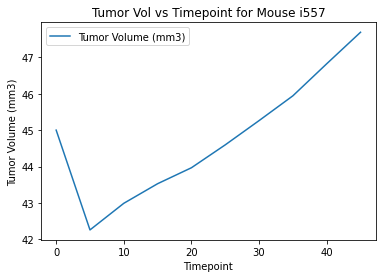

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#find capomulin mouse ids
cap_mice_df = clean_merge_df.loc[(clean_merge_df['Drug Regimen'] == 'Capomulin')]

#get data frame for mouse i557
mouse_df = clean_merge_df.loc[(clean_merge_df['Mouse ID'] == 'i557')]

#generate line plot
mouse_df.plot(kind='line', x='Timepoint', y='Tumor Volume (mm3)', ylabel='Tumor Volume (mm3)', title='Tumor Vol vs Timepoint for Mouse i557')


<function matplotlib.pyplot.show(close=None, block=None)>

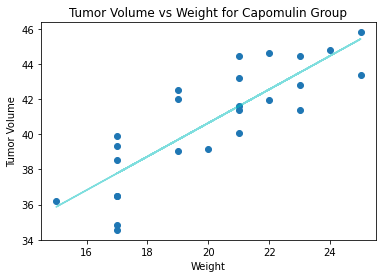

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#gather values
average_cap_mice_tumor = cap_mice_df.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()
weight = cap_mice_df.groupby(['Mouse ID'])['Weight (g)'].mean()

#calculate cor, slope, inter, reg etc
correlation = st.pearsonr(weight, average_cap_mice_tumor)
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, average_cap_mice_tumor)
regress_values = weight * slope + intercept

#plt everything
plt.scatter(weight, average_cap_mice_tumor)
plt.plot(weight,regress_values,"c-", alpha=.50)
plt.title('Tumor Volume vs Weight for Capomulin Group')
plt.xlabel('Weight')
plt.ylabel('Tumor Volume')

#dispaly plot
plt.show



## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#values captured above printed here
print (f'The correlation is {round(correlation[0],2)}')
print (f'Linear regression model: y = {str(round(slope,2))}x + {str(round(intercept,2))}')


The correlation is 0.84
Linear regression model: y = 0.95x + 21.55
